In [1]:
# importing libs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
# read dataset of train

dataset = pd.read_csv('Google_Stock_Price_Train.csv')
dataset_train = dataset.iloc[:,1:2].values

In [3]:
# scale data between 0 and 1

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(dataset_train)

In [4]:
# read dataset test and seperate 'open' column

dataset_t = pd.read_csv('Google_Stock_Price_Test.csv')
dataset_test = dataset_t.iloc[:,1:2].values
dataset_test = scaler.transform(dataset_test)

# split day from Date column

X_day = dataset_t['Date'].str.split('/', expand=True)

In [5]:
# Prepare dataset test, we need one window, which choose 60 in this problem, 
# from the lastest data of train dataset to predict in test data set

X_test = []
for i in range(60):
  X_test.append(X_train_scaled[1198+i])

for i in range(20):
  X_test.append(dataset_test[i])

X_test = np.array(X_test)

In [6]:
# Build test dataset

X_test_model = []
Y_test_model = []
for i in range(60,80):
  X_test_model.append(X_test[i-60:i,0])
  Y_test_model.append(X_test[i])


In [7]:
# Reforming to NP arrays

X_test_model = np.array(X_test_model)
Y_test_model = np.array(Y_test_model)

X_test_model.shape ,Y_test_model.shape

((20, 60), (20, 1))

In [8]:
# x test should be reshape

X_test_model = np.reshape(X_test_model,(X_test_model.shape[0],X_test_model.shape[1],1))
X_test_model.shape

(20, 60, 1)

In [9]:
# Build train dataset

X_train = []
Y_train = []
for i in range(60,1258):
  X_train.append(X_train_scaled[i-60:i,0])
  Y_train.append(X_train_scaled[i,0])

In [10]:
# Reforming to NP arrays

X_train,Y_train = np.array(X_train),np.array(Y_train)
X_train.shape

(1198, 60)

In [11]:
# Reshape X train

X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1198, 60, 1)

In [12]:
# import libs

import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [13]:
# Preparing sequential model

model = Sequential()

In [14]:
# First layer LSTM 
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.20))

# Second layer LSTM
model.add(LSTM(units=100, return_sequences=True ))
model.add(Dropout(0.20))

# Third layer LSTM 
model.add(LSTM(units=70, return_sequences=True ))
model.add(Dropout(0.20))

# Forth layer LSTM 
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.20))

# Dense output layer 
model.add(Dense(units=1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 100)           60400     
                                                                 
 dropout_1 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 70)            47880     
                                                                 
 dropout_2 (Dropout)         (None, 60, 70)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [15]:
# Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

# Fit the model
model.fit(X_train,Y_train,epochs=50,batch_size=32,validation_split=0.05)

Epoch 1/50
36/36 [==============================] - 12s 117ms/step - loss: 0.0337 - val_loss: 0.0123
Epoch 2/50
36/36 [==============================] - 2s 69ms/step - loss: 0.0067 - val_loss: 0.0030
Epoch 3/50
36/36 [==============================] - 2s 69ms/step - loss: 0.0047 - val_loss: 0.0062
Epoch 4/50
36/36 [==============================] - 3s 70ms/step - loss: 0.0049 - val_loss: 0.0022
Epoch 5/50
36/36 [==============================] - 3s 70ms/step - loss: 0.0045 - val_loss: 0.0013
Epoch 6/50
36/36 [==============================] - 2s 69ms/step - loss: 0.0051 - val_loss: 0.0014
Epoch 7/50
36/36 [==============================] - 2s 69ms/step - loss: 0.0042 - val_loss: 0.0013
Epoch 8/50
36/36 [==============================] - 2s 69ms/step - loss: 0.0048 - val_loss: 0.0014
Epoch 9/50
36/36 [==============================] - 2s 69ms/step - loss: 0.0040 - val_loss: 0.0014
Epoch 10/50
36/36 [==============================] - 2s 69ms/step - loss: 0.0043 - val_loss: 0.0012
Epoch 1

In [16]:
# Predict the x test data

y_predict = model.predict(X_test_model)

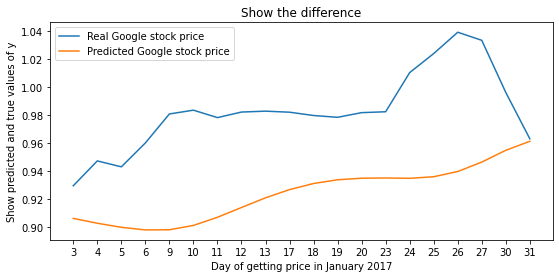

In [19]:
# Show the difference between predicted values and true ones

plt.figure(figsize=(9, 4))
plt.plot(X_day[1], Y_test_model, label='Real Google stock price')
plt.plot(X_day[1], y_predict, label='Predicted Google stock price')
  
plt.xlabel('Day of getting price in January 2017')
plt.ylabel('Show predicted and true values of y')
plt.title("Show the difference")

plt.legend()